In [126]:
from pyralysis.fft import fft2, ifft2
from pyralysis.utils.fourier import phase_shift_grid
from pyralysis.io.fits import FITS
import matplotlib.pyplot as plt
import dask.array as da

In [127]:
fits_io = FITS(input_name="/home/miguel/Downloads/Einstein.fits")
image = fits_io.read()

/home/miguel/Documents/pyralysis/src/pyralysis/reconstruction/image.py:75: UserWarning: The image provided has invalid CRPIX keywords in header. Default values will be used instead.
  warnings.warn(


In [128]:
image = image.data.data

In [129]:
image.shape, image.dtype

((300, 300), dtype('>f4'))

In [130]:
hermitian_symmetry = False
padding_factor = 2.0

In [131]:
result = fft2(
    image,
    sign_convention="positive",
    hermitian_symmetry=hermitian_symmetry,
    padding_factor=padding_factor
)

In [132]:
result.shape

(600, 600)

In [133]:
result.dtype

dtype('complex64')

In [134]:
result = phase_shift_grid(result, 0, 0)

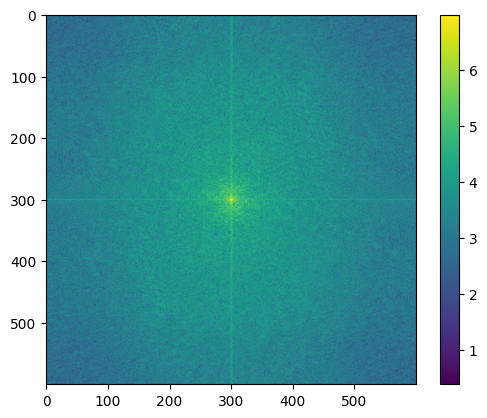

In [135]:
plt.imshow(da.log10(da.abs(result) + 1))
plt.colorbar()

In [136]:
image_back = ifft2(result, sign_convention="positive", hermitian_symmetry=hermitian_symmetry)

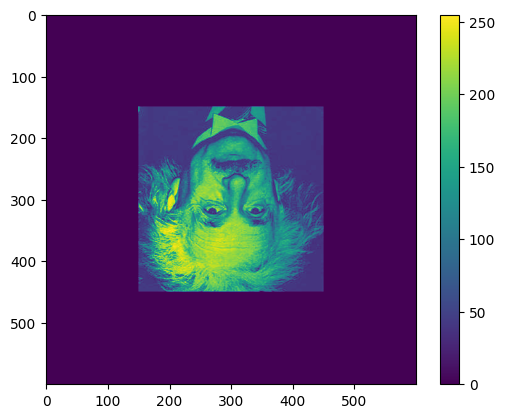

In [137]:
plt.imshow(image_back)
plt.colorbar()